## Data Analytics Challenge

### What to do?

#### You should aim for:

#### Exploratory data analysis

* Get to know the domain
* Explore your data
* Clean your data
* Take a look and find connections between data

Note: Above you have your data set in a folder but for further reference here is the data set source: https://www.kaggle.com/datasets/anderas/car-consume

#### Visualization

* Plot your data in a meaningful way
* Predictions

* Do you have any hypothesis?
* Can you make any kind of prediction: regression and/or classification?
* Storytelling

* What metrics are you obtaining?
* Explain your conclusions
* Shape your new data and conclusions in such a way that is appealing to the listener and tells a story


#### Extra:

* Enrich your dataset

#### Add value: obtain related data by web scraping or with APIs.
#### Database

#### Load the processed information into a database

### Importing the required libraries

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

### Importing the Data 

In [89]:
data = pd.read_csv('measurements.csv')
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


### Checking the Data Type and the NaN count per column:

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


### Checking the unique value counts per column, including the NaNs

In [91]:
for col in data.columns:
    print(col, data2[col].value_counts(dropna=False))

distance 11.8    37
16.0    24
12.3    23
12.4    18
15.4    14
        ..
44.9     1
36.6     1
9.9      1
16.8     1
14.7     1
Name: distance, Length: 174, dtype: int64
consume 5.0     27
4.5     27
4.6     22
4.7     21
4.3     20
4.1     20
5.1     19
4.8     19
4.4     17
4.0     17
4.9     16
4.2     15
5.3     14
3.9     14
5.2     12
3.8     11
5.7     11
5.6     10
5.4      9
3.7      8
5.8      7
5.5      6
5.9      5
3.6      4
6.4      4
6.1      4
6.2      4
6.0      4
6.3      4
8.1      2
6.5      2
7.4      2
6.9      1
8.7      1
12.2     1
7.9      1
10.8     1
9.9      1
7.1      1
3.3      1
9.0      1
11.5     1
6.6      1
Name: consume, dtype: int64
speed 42    18
43    17
38    16
26    15
36    15
33    15
40    15
32    12
44    12
37    12
29    11
39    11
55    11
46    11
45    10
58    10
25    10
24     9
50     9
35     9
57     8
41     8
52     7
53     6
48     6
28     6
30     6
21     6
61     6
51     6
47     5
56     5
22     5
34     4
49     

### Percentage of Null Values 

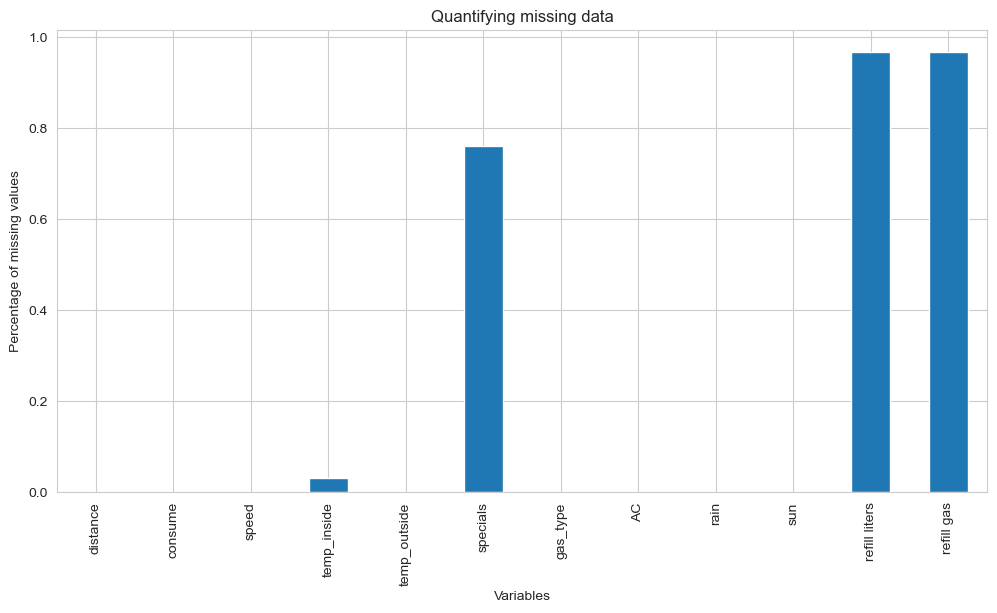

In [92]:
data.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')
plt.show()

<Figure size 1000x600 with 0 Axes>

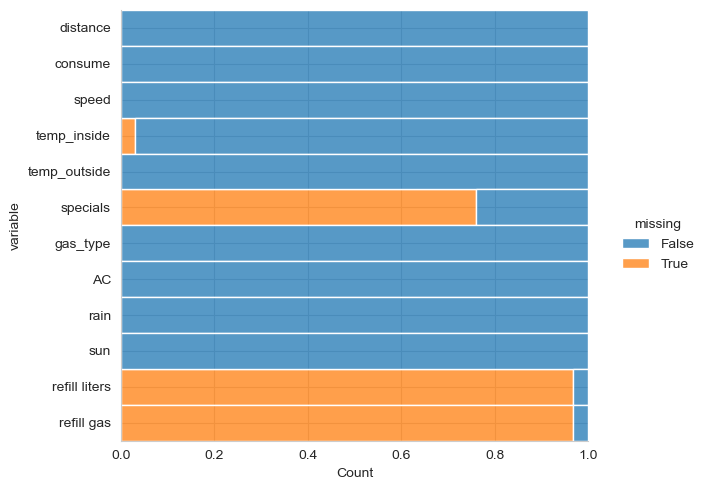

In [93]:
plt.figure(figsize=(10,6))
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
    )
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

### Dropping columns with a high number on null values

In [94]:
data = data.drop(['specials', 'refill liters', 'refill gas'], axis = 1)

### Transforming the Object variables into Numbers:

In [95]:
def properfloats(x):
    if type(x) == str:
        if ',' in x:
            x = x.replace(',','.')
        return x

In [96]:
#getting a list with the columns to transform
cols_tonumbers = ['distance', 'consume', 'temp_inside']

In [97]:
for col in cols_tonumbers:
    data[col] = data2[col].apply(properfloats)

In [98]:
for col in cols_tonumbers:
    data[col] = pd.to_numeric(data2[col], errors = 'coerce')

In [99]:
data

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0,0,0
384,16.1,4.3,38,25.0,31,SP98,1,0,0
385,16.0,3.8,45,25.0,19,SP98,0,0,0
386,15.4,4.6,42,25.0,31,SP98,1,0,0


In [100]:
data.dtypes

distance        float64
consume         float64
speed             int64
temp_inside     float64
temp_outside      int64
gas_type         object
AC                int64
rain              int64
sun               int64
dtype: object

### Removing columns due to the high amount of NaNs

In [123]:
data['temp_inside'] = data['temp_inside'].fillna(np.mean(data['temp_inside']))

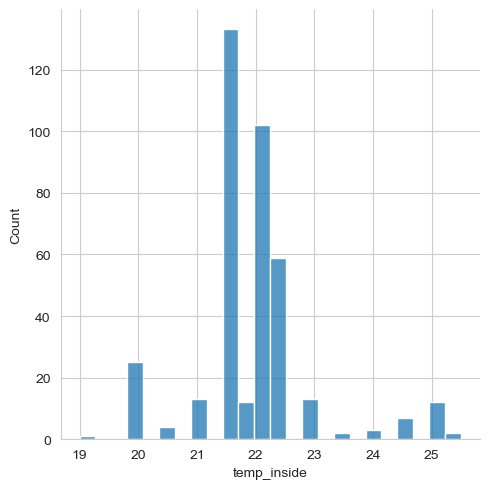

In [124]:
sns.displot(data['temp_inside'])
plt.show()

### Exploratory Data Analysis

### Separating the numerical and categorical data

### X - y Split

In [127]:
X = data.drop(['gas_type'], axis =1)
y = data[['gas_type']]

### Train-Test Split

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=70)

### Transform

In [131]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df  = pd.DataFrame(X_test,columns=X.columns)

In [ ]:
X_train_df = X_train_df.copy()
X_test_df = X_test_df.copy()

### Scaling variables with StandardScaler

In [132]:
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler().fit(X_train_df.values)

#X_train:
X_train_standardized = stdscaler.transform(X_train_df.values)
X_train_standardized_df =pd.DataFrame(X_train_standardized, columns= X_train_df.columns, index = X_train_df.index)
print('DataFrame for X_train:')
print('-----------------------\n')
display(X_train_standardized_df)

#X_test:
X_test_standardized = stdscaler.transform(X_test_df.values)
X_test_standardized_df = pd.DataFrame(X_test_standardized, columns= X_test_df.columns, index = X_test_df.index)
print('DataFrame for X_test:')
print('-----------------------\n')
display(X_test_standardized_df)

DataFrame for X_train:
-----------------------



,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,kpl
246,-0.293063,0.770088,-0.373137,0.581825,-0.044524,-0.283089,2.636042,-0.289683,-0.427607
326,-0.161967,-0.395857,0.088937,0.094889,1.844225,-0.283089,-0.379357,-0.289683,-0.140402
151,-0.462395,0.089953,-1.066249,-0.392047,-0.335101,-0.283089,-0.379357,-0.289683,-0.505936
354,-0.003559,-0.590182,0.319974,0.094889,1.698936,-0.283089,-0.379357,-0.289683,0.094584
137,-0.358611,-0.395857,-0.296125,-0.392047,-0.916254,-0.283089,2.636042,-0.289683,-0.349279
...,...,...,...,...,...,...,...,...,...
316,0.744779,-0.007209,0.859061,0.094889,0.536630,-0.283089,-0.379357,-0.289683,0.668995
280,-0.129193,-0.978830,0.011924,0.094889,-0.480389,-0.283089,-0.379357,-0.289683,0.042365
114,0.695618,-0.201533,0.011924,-1.365920,-0.625677,-0.283089,-0.379357,-0.289683,0.695104
214,-0.298525,-0.395857,0.011924,-1.852856,0.246053,-0.283089,-0.379357,-0.289683,-0.270950


DataFrame for X_test:
-----------------------



,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,kpl
17,-0.358611,0.187116,-0.758199,-0.392047,-1.206831,-0.283089,-0.379357,-0.289683,-0.427607
312,0.078376,-0.881668,1.090098,0.094889,0.827206,-0.283089,-0.379357,3.452053,0.277351
71,-0.893918,1.255899,-1.682348,-0.392047,-0.189812,-0.283089,-0.379357,-0.289683,-0.949799
331,0.171235,-0.104371,0.396986,3.016507,2.280090,3.532458,-0.379357,3.452053,0.146803
70,-0.331299,0.284278,1.013085,-0.392047,0.100764,-0.283089,-0.379357,-0.289683,-0.401498
...,...,...,...,...,...,...,...,...,...
270,-0.129193,-1.075993,-0.065088,0.094889,0.100764,-0.283089,-0.379357,-0.289683,0.068474
65,-0.325837,-0.201533,1.167110,-0.392047,-0.480389,-0.283089,-0.379357,-0.289683,-0.349279
320,0.389728,-1.270317,-1.143261,0.094889,2.280090,-0.283089,-0.379357,3.452053,0.825652
307,-0.353148,0.381440,-0.604175,0.094889,0.246053,-0.283089,-0.379357,-0.289683,-0.453717


In [ ]:
////////

In [ ]:
////////

### Exploring the numerical data

ValueError: num must be 1 <= num <= 6, not 7

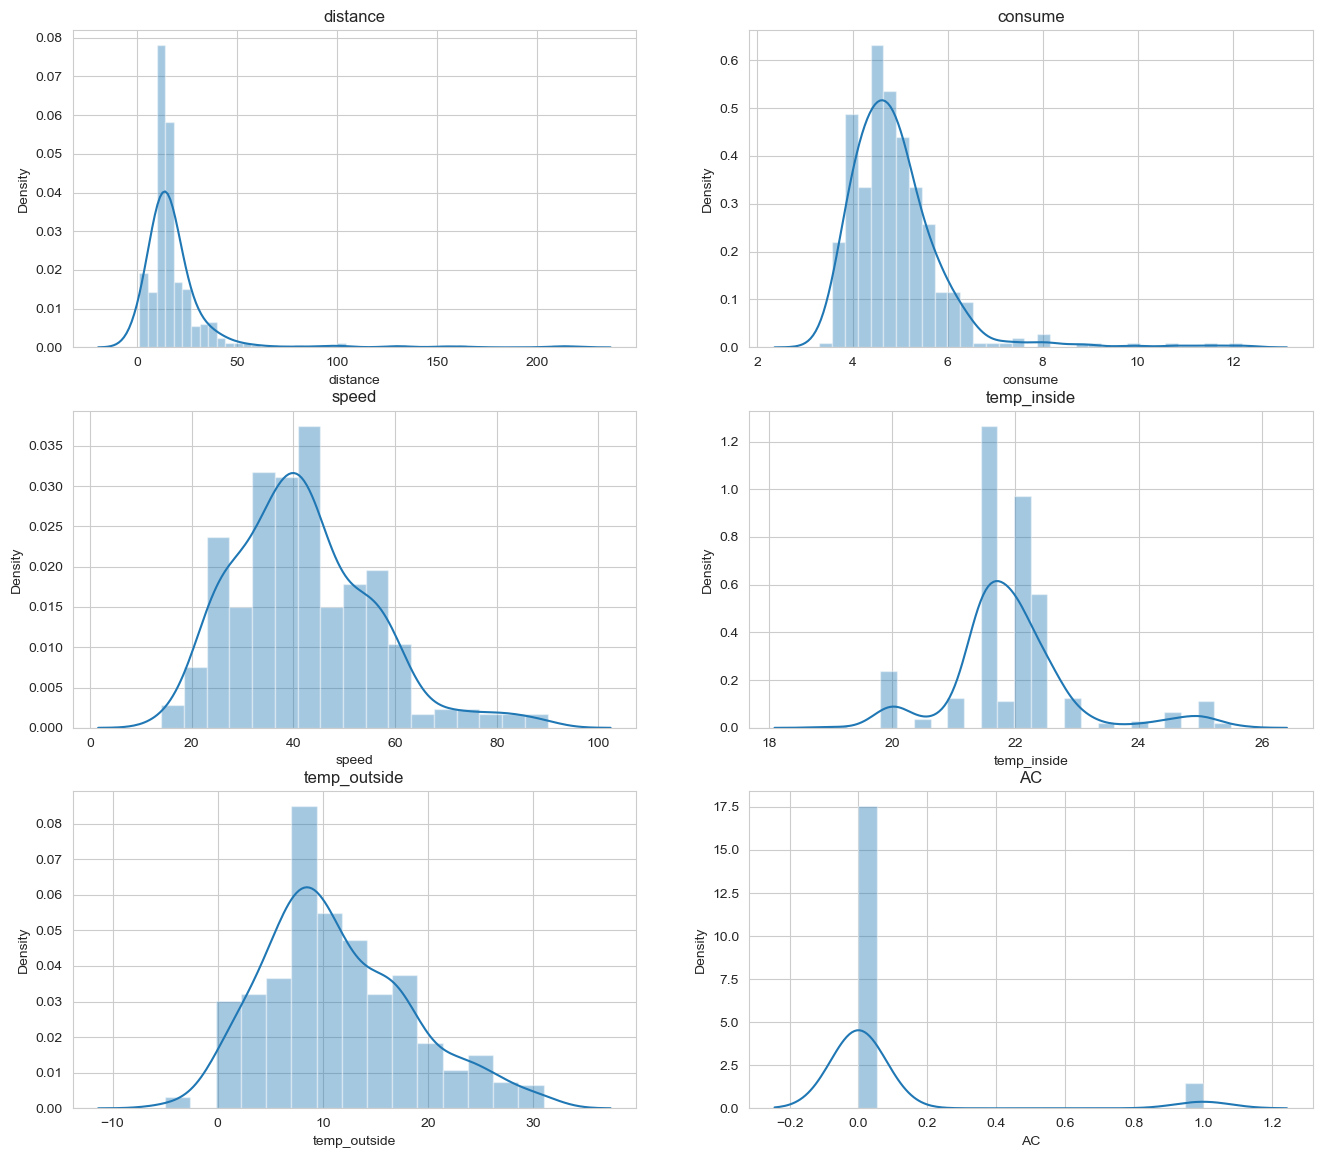

In [103]:
distributions = check_dist(numericals, 3, 2)

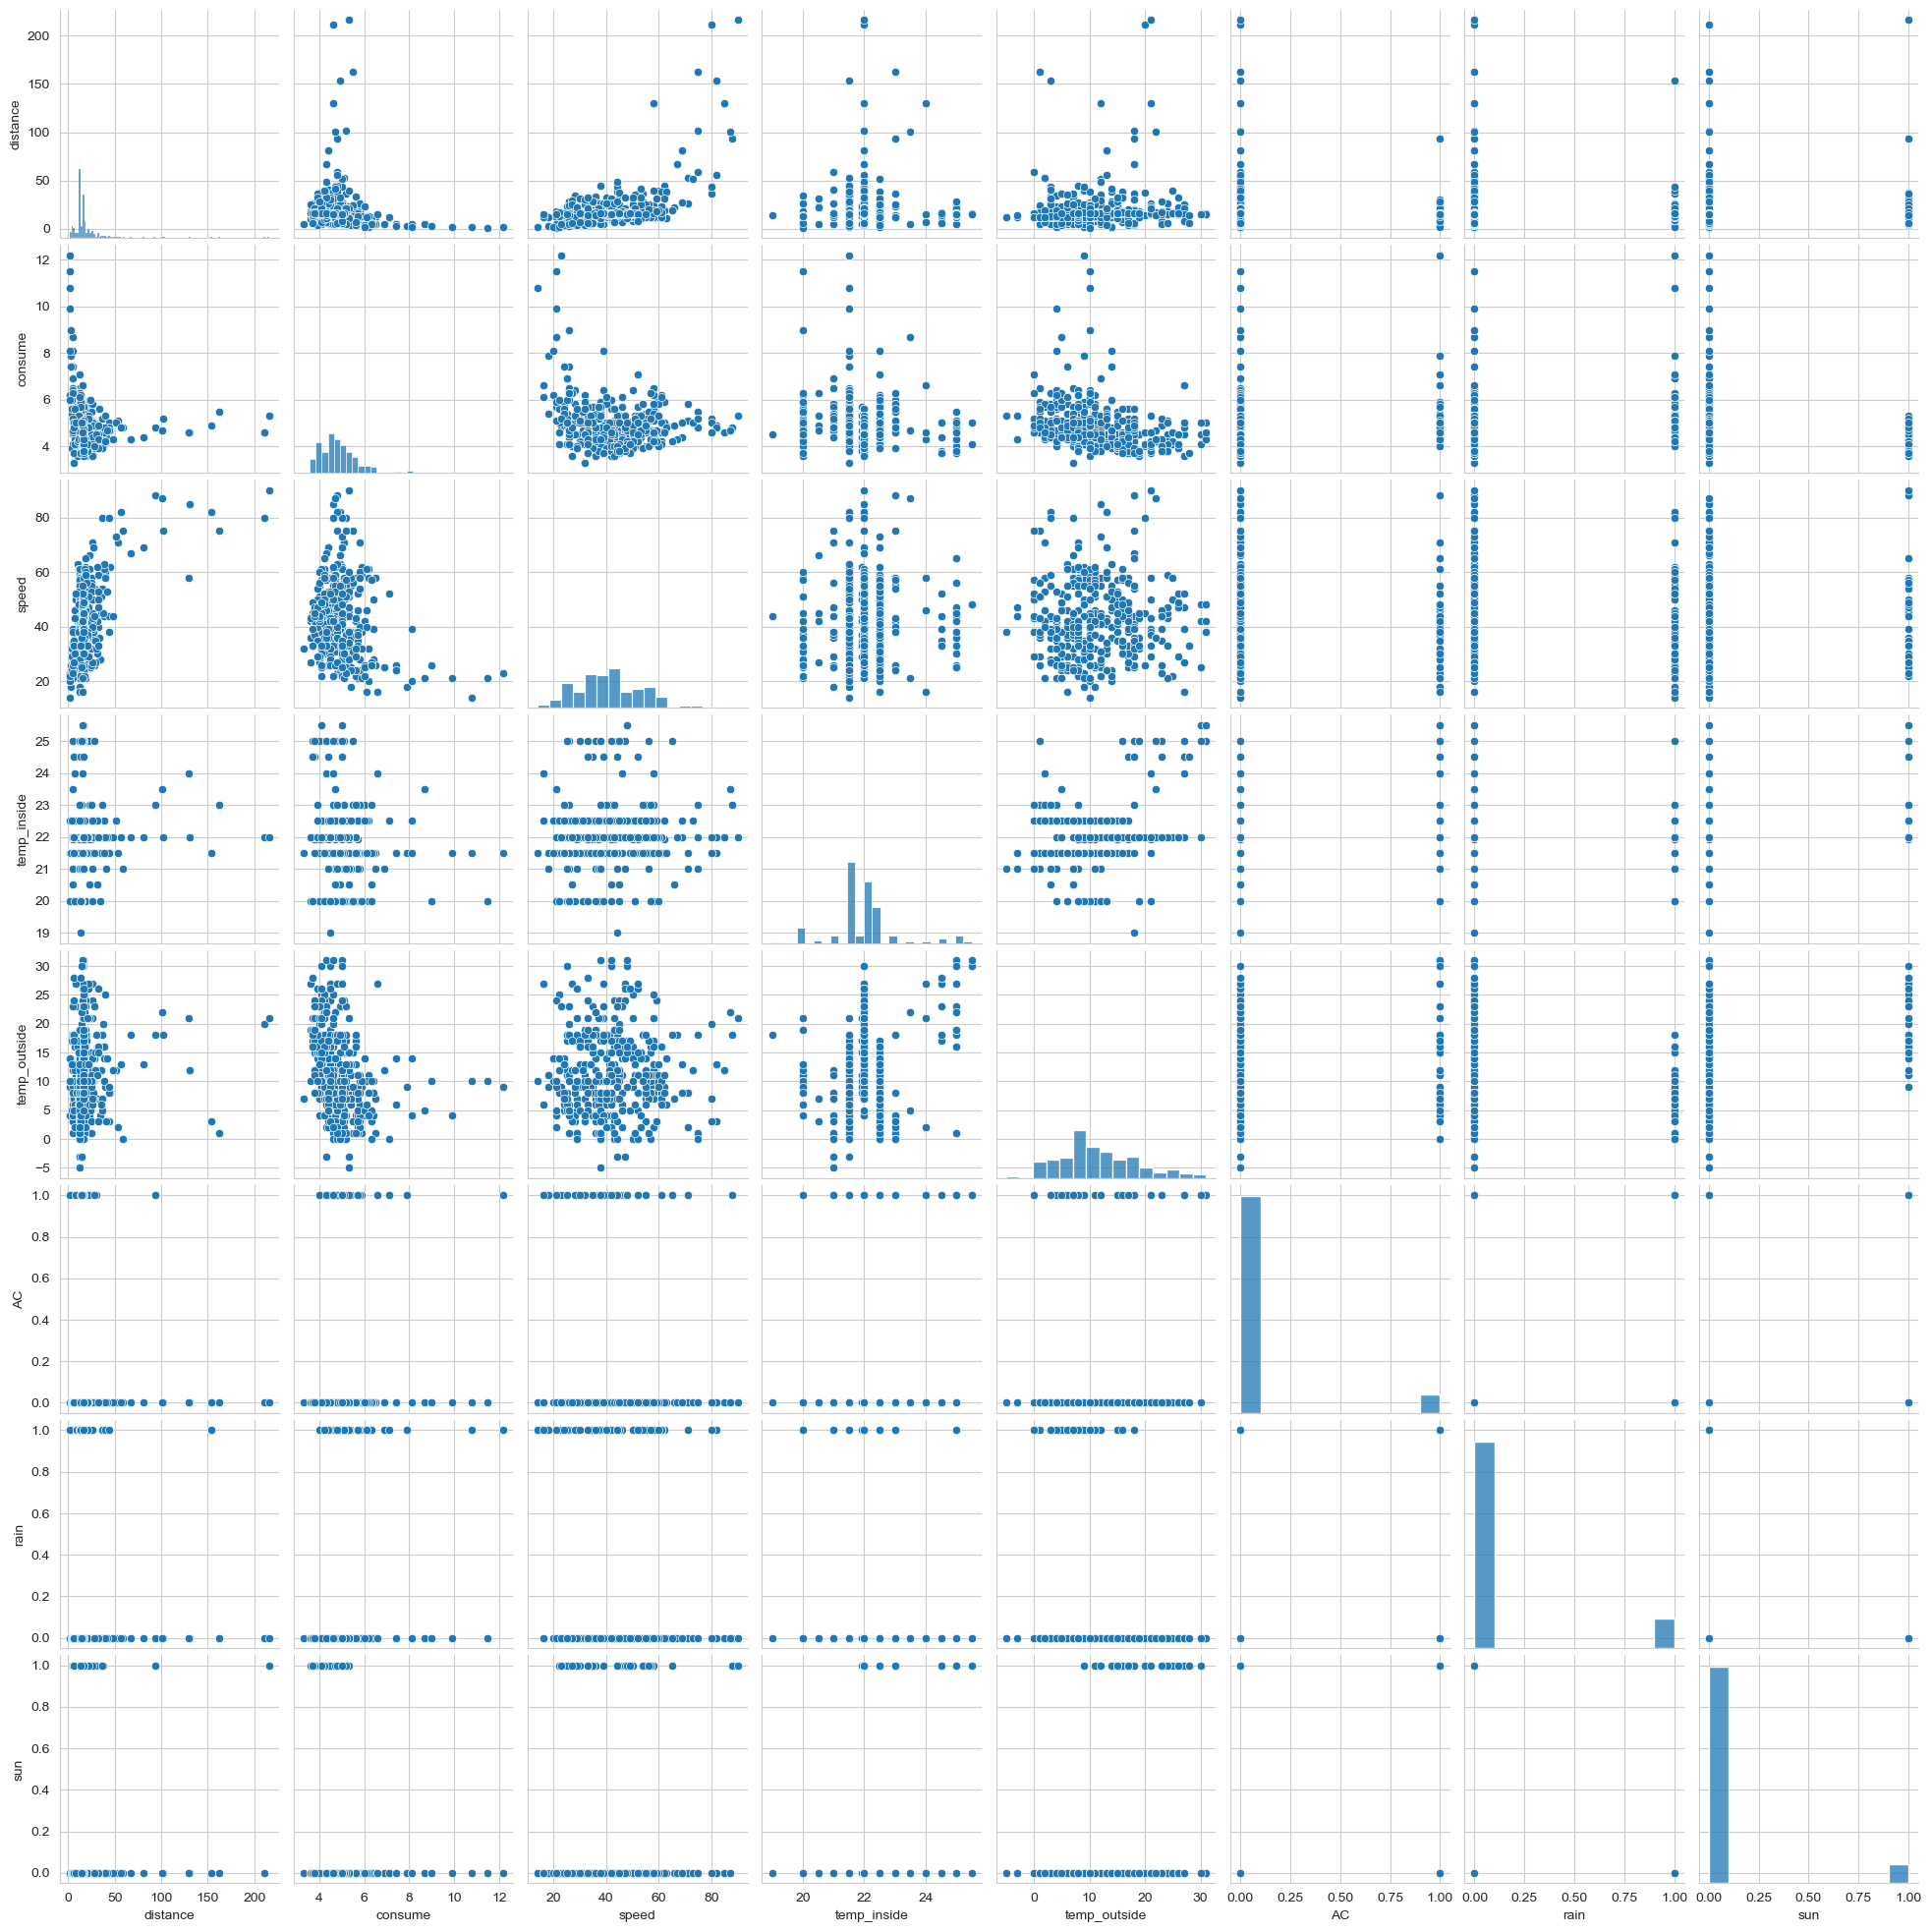

In [104]:
sns.pairplot(numericals)

### There are correlation between speed, distance and consume, but no strong correlations between the variables

In [ ]:
////////

In [ ]:
////////

ValueError: num must be 1 <= num <= 4, not 5

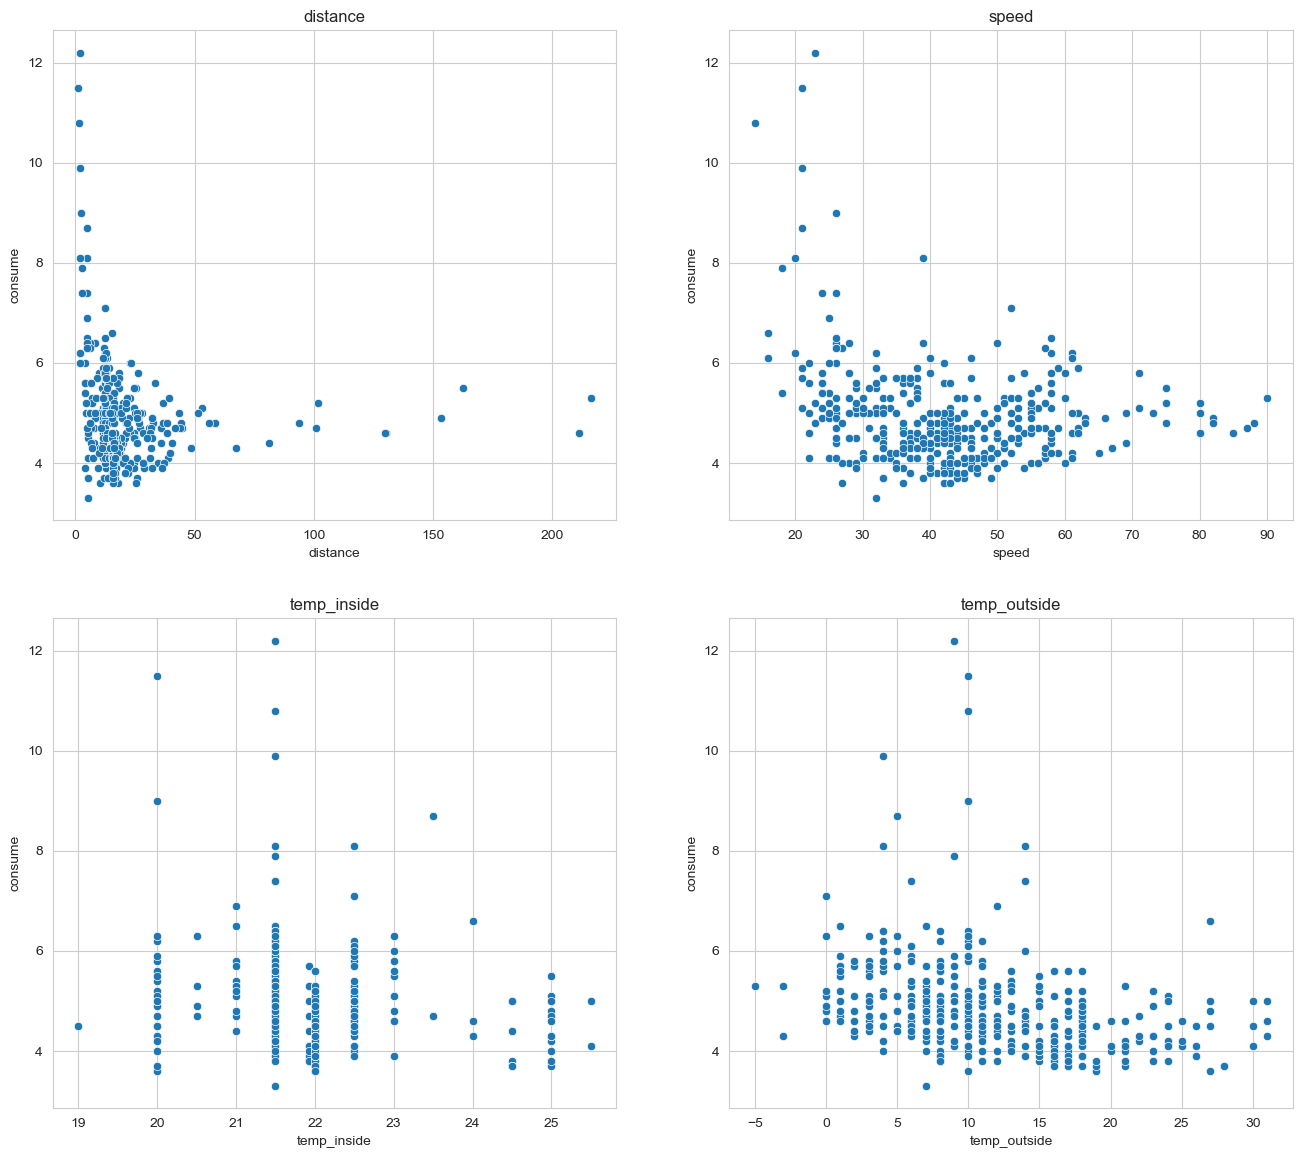

In [105]:
scatterplots = scatter(numericals, 'consume', 2, 2)

### The consumption is higher when the car starts

In [ ]:
////////

In [ ]:
////////

ValueError: num must be 1 <= num <= 6, not 7

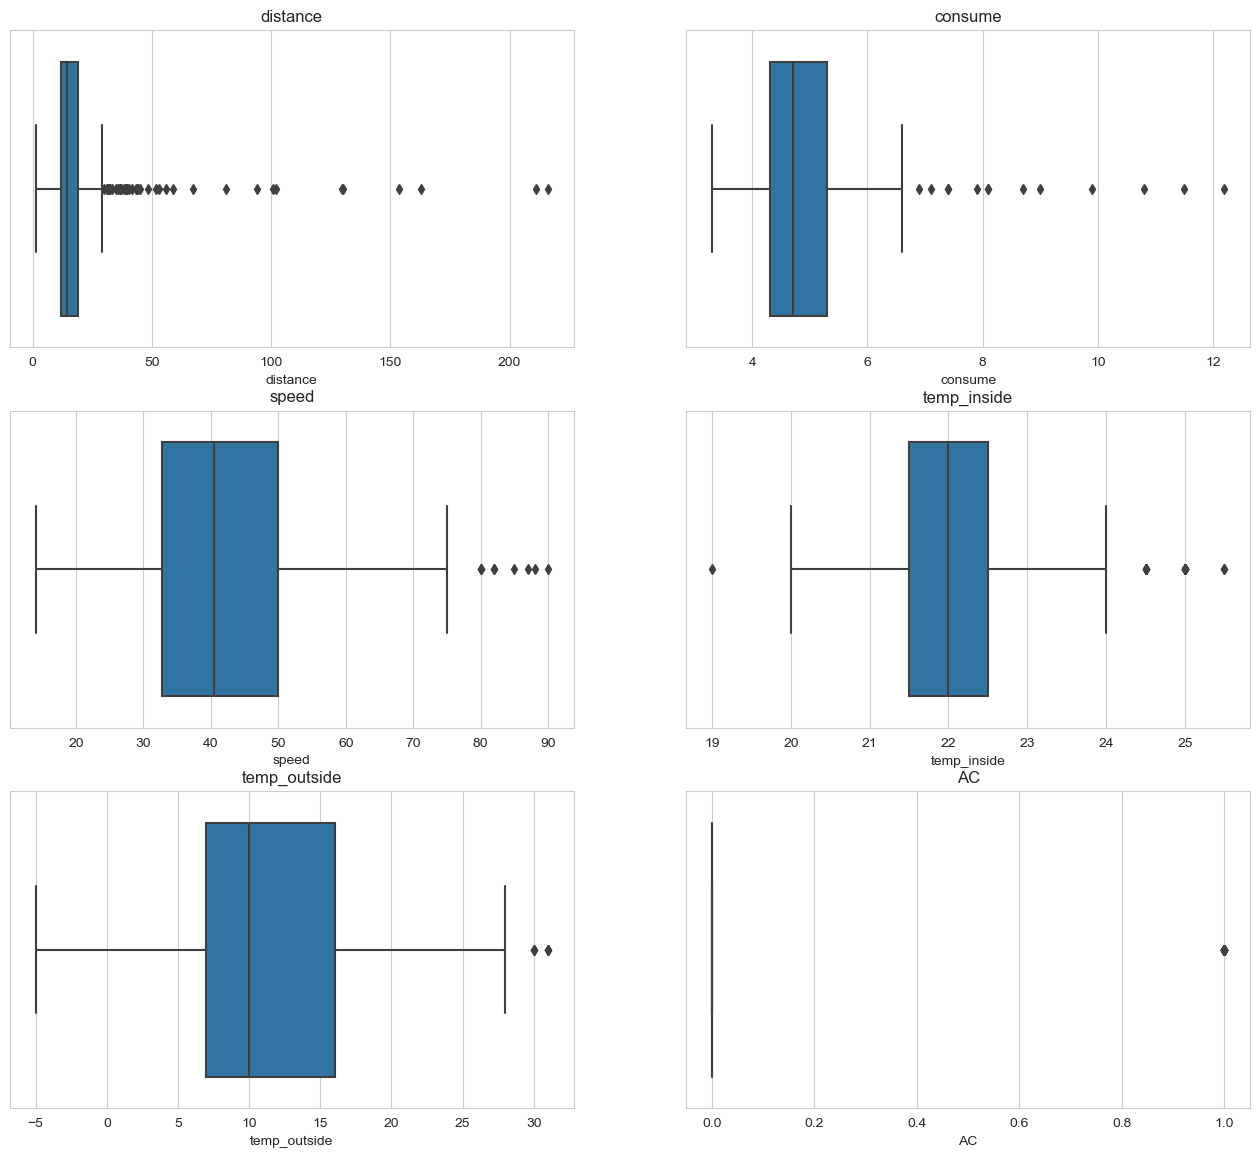

In [122]:
boxplots = boxplot(numericals, 3, 2)

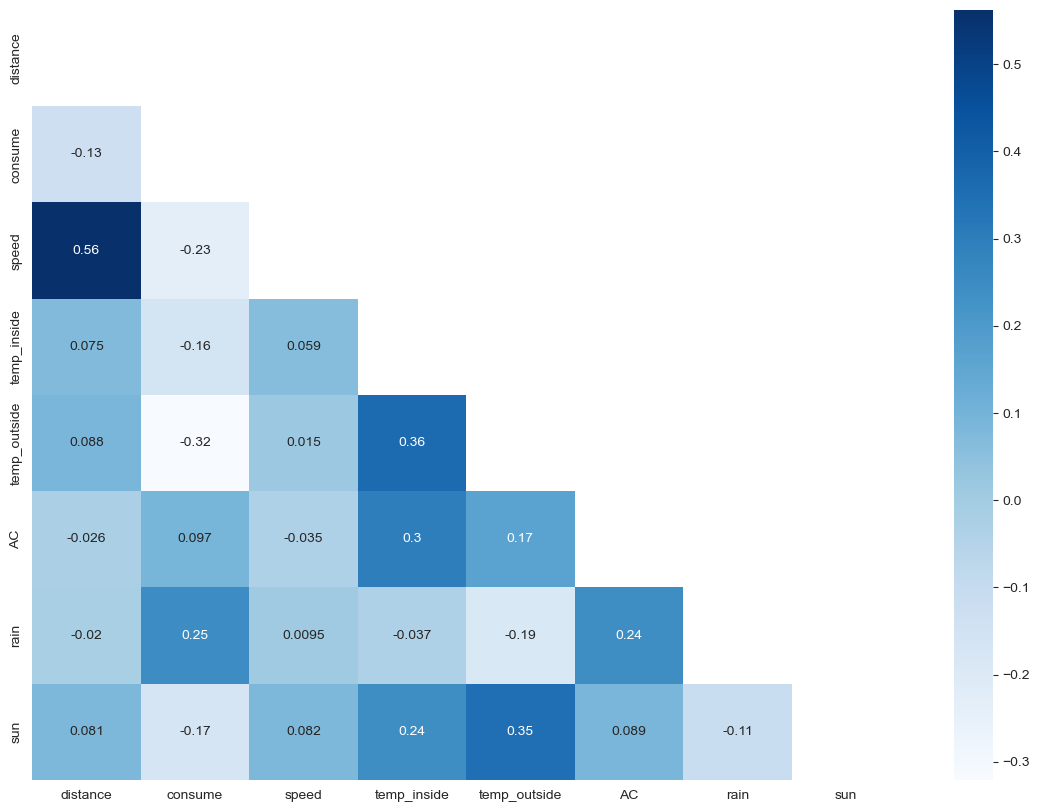

In [107]:
map_1 = heatmap(numericals)
# multicolinearity detected
# strongest correlations between speed and distance, temp_outside and temp_inside

## Exploring the categorical data

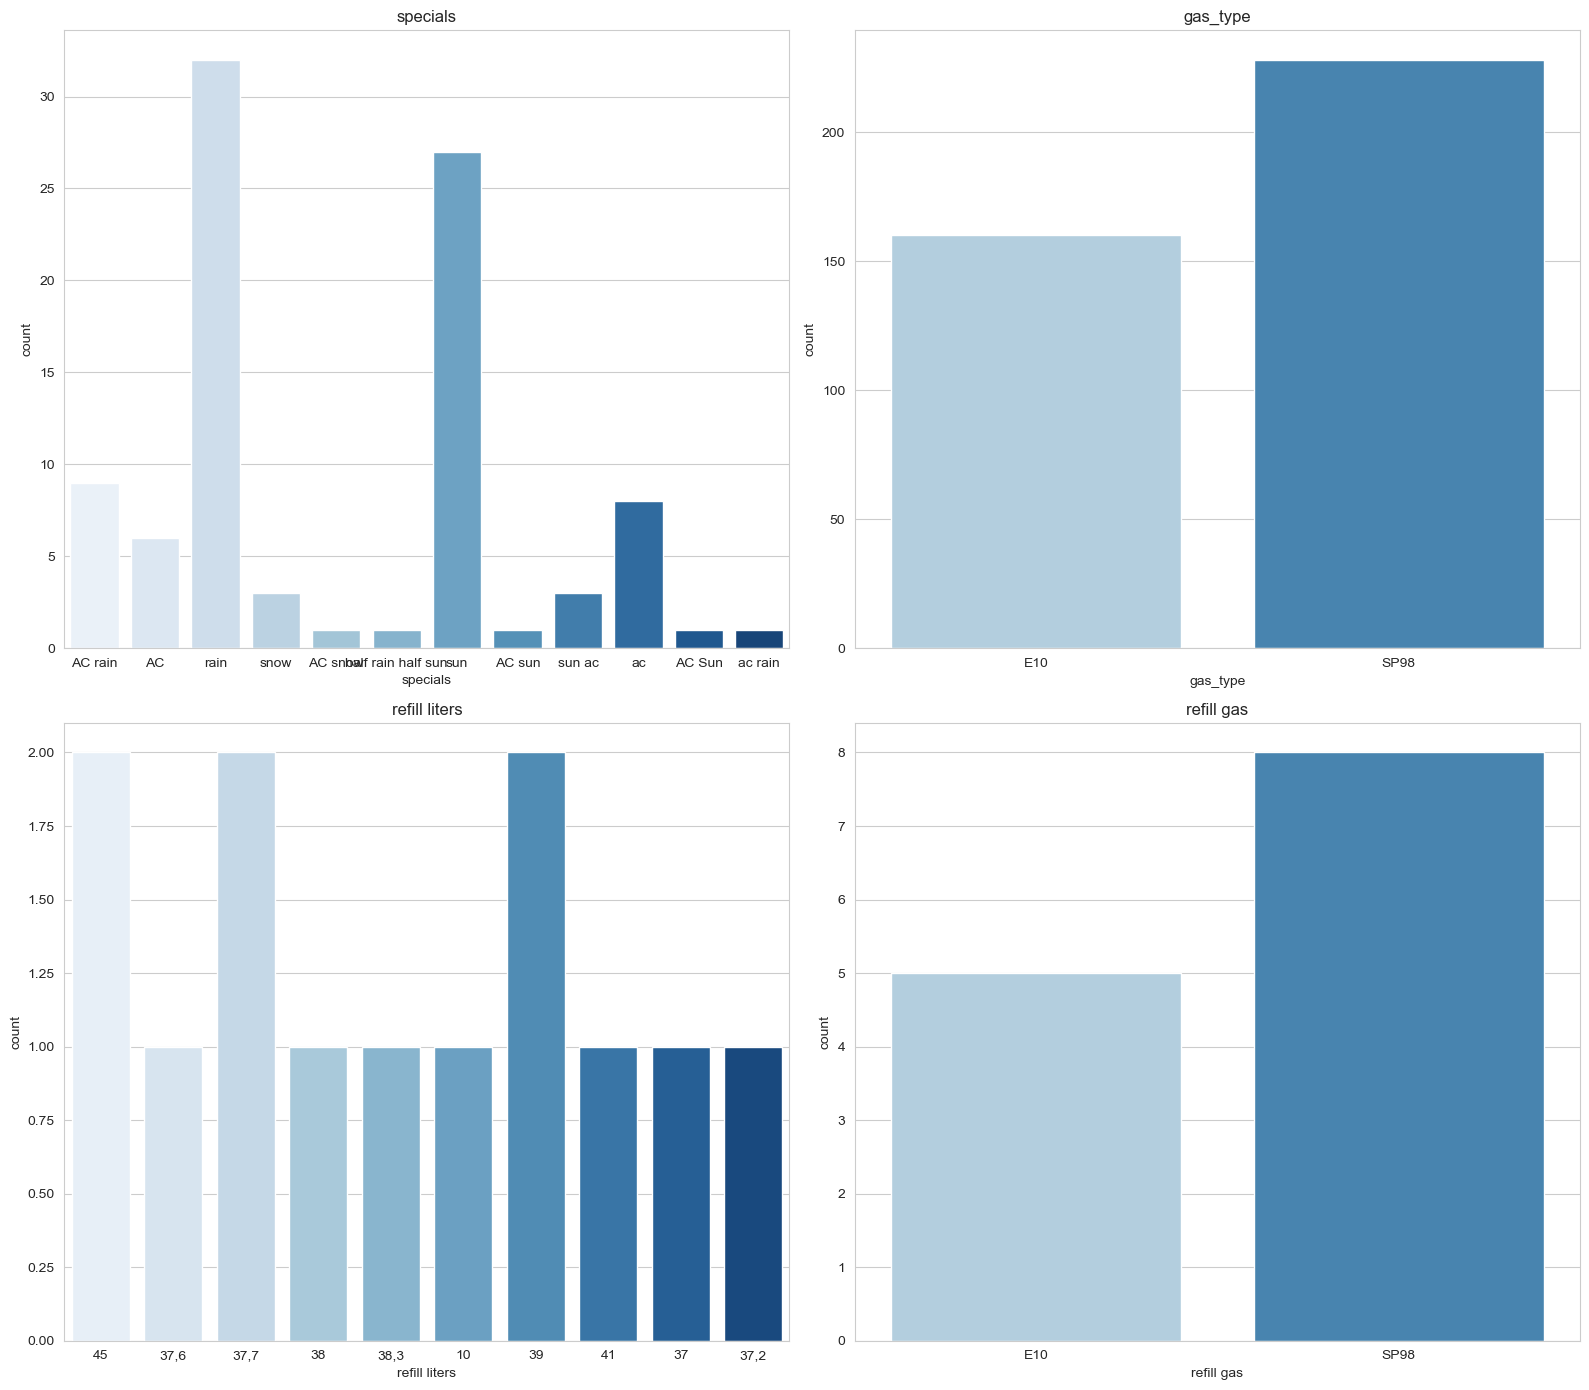

In [108]:
countplots = countplot(cat, 2, 2)

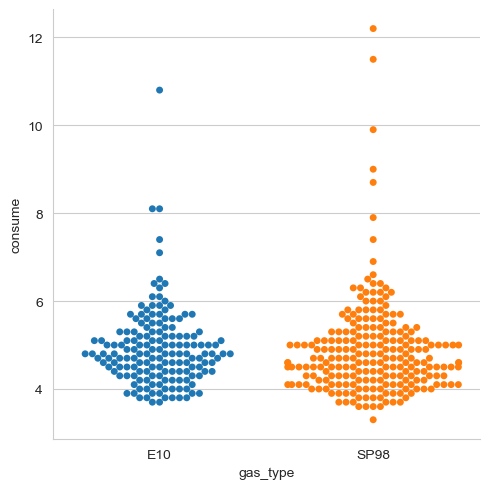

In [109]:
sns.catplot(x="gas_type", y="consume", kind='swarm', data=data)

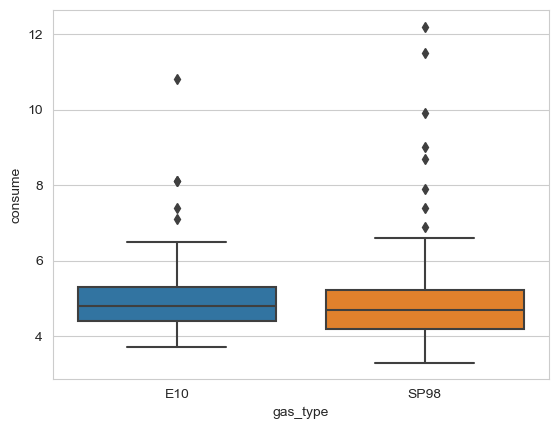

In [118]:
ax = sns.boxplot(x="gas_type", y="consume", data=data)

In [110]:
data.gas_type.value_counts()
# we're also dealing with some data imbalance

SP98    228
E10     160
Name: gas_type, dtype: int64

In [111]:
def check_corr_target(df, target):
    correlated = []
    not_correlated = []

    for col in df.columns:
        ct_table_ind_=pd.crosstab(df[col], df[target])
        chi2_stat_, p_, dof_, expected_ = stats.chi2_contingency(ct_table_ind_)
        prob = 0.95
        critical_ = chi2.ppf(prob, dof_)
        if abs(chi2_stat_) >= critical_:
            correlated.append(col)
        else:
            not_correlated.append(col)
    
    print('the correlated features are: ', correlated)
    print('the non-correlated features are: ', not_correlated)

In [112]:
gas_corr = check_corr_target(data, target = 'consume')

the correlated features are:  ['distance', 'consume', 'speed', 'temp_inside', 'AC', 'rain']
the non-correlated features are:  ['temp_outside', 'gas_type', 'sun']


In [113]:
# extracting the consume value for E10
e10 = data[data['gas_type'] == 'E10']
e10 = e10.consume.array
print(e10)

# extracting the consume value for SP98
sp98 = data[data['gas_type'] == 'SP98']
sp98 = sp98.consume.array
print(sp98)

<PandasArray>
[5.0, 4.2, 5.5, 3.9, 4.5, 6.4, 4.4, 5.0, 6.4, 5.3,
 ...
 4.1, 4.0, 3.8, 3.8, 3.8, 5.1, 4.0, 4.8, 3.9, 4.6]
Length: 160, dtype: float64
<PandasArray>
[3.3, 9.9, 5.1, 4.9, 4.9, 4.7, 5.1, 4.9, 4.2, 6.1,
 ...
 4.4, 3.8, 5.0, 3.7, 3.7, 3.7, 4.3, 3.8, 4.6, 5.0]
Length: 228, dtype: float64


In [114]:
# find the variance of each gas
print(np.var(e10), np.var(sp98))
np.var(e10)/np.var(sp98)

# the ratio is < 4 so we can assume that the population variances are equal

0.8066484375000001 1.2453501077254547


0.6477282432434099

In [115]:
ttest_ind(e10, sp98, equal_var=True)

Ttest_indResult(statistic=0.3011626300254617, pvalue=0.7634526478628367)

### Observations

### The p value 0.76 in our test is greater than the level of significance 0.05, which means the test statistic falls in the region between the critical regions. 

In [ ]:
////////

In [ ]:
////////

### Creating a new column with the kilometers per liter: kpl

In [116]:
data['kpl'] = round(data['distance']/data['consume'], 1)
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,kpl
0,28.0,5.0,26,21.5,12,E10,0,0,0,5.6
1,12.0,4.2,30,21.5,13,E10,0,0,0,2.9
2,11.2,5.5,38,21.5,15,E10,0,0,0,2.0
3,12.9,3.9,36,21.5,14,E10,0,0,0,3.3
4,18.5,4.5,46,21.5,15,E10,0,0,0,4.1


In [117]:
print('E10 consumes an average of', round(data[data['gas_type'] == 'E10']['kpl'].mean(), 2), 'kilometer per liter.')
print('SP98 consumes an average of', round(data[data['gas_type'] == 'SP98']['kpl'].mean(), 2), 'kilometer per liter.')
print('Average consumption difference is', round(data[data['gas_type'] == 'E10']['kpl'].mean() - data[data['gas_type'] == 'SP98']['kpl'].mean(), 2), 'kilometer per liter.')
print()
print('E10 consumed an average of', round(data[data['gas_type'] == 'E10']['consume'].mean(), 2), 'liters.')
print('SP98 consumes an average of', round(data[data['gas_type'] == 'SP98']['consume'].mean(), 2), 'liters.')
print('Average consumption difference is', round(data[data['gas_type'] == 'E10']['consume'].mean() - data[data['gas_type'] == 'SP98']['consume'].mean(), 2), 'liters.')

E10 consumes an average of 4.47 kilometer per liter.
SP98 consumes an average of 4.01 kilometer per liter.
Average consumption difference is 0.46 kilometer per liter.

E10 consumed an average of 4.93 liters.
SP98 consumes an average of 4.9 liters.
Average consumption difference is 0.03 liters.


### One liter of E10 takes a car 0.46 km further than one litre of SP98. In urban traffic, this makes a clear difference. 

In [ ]:
////////

In [ ]:
////////